1. Initialize weights w = 0, bias b = 0
2. Define the learning rate alpha and number of iterations
3. Loop for a fixed number of iterations or until convergence:
    a. Compute the predicted probability:
       h = sigmoid(w * X + b)
    b. Compute the cost function:
       J = -1/m * sum(y * log(h) + (1 - y) * log(1 - h))
    c. Compute the gradients (partial derivatives):
       dw = (1/m) * sum((h - y) * X)
       db = (1/m) * sum(h - y)
    d. Update the parameters (weights and bias):
       w = w - alpha * dw
       b = b - alpha * db
4. Return the learned parameters (w, b)
5. Make predictions:
   - For new data X_new, use sigmoid(w * X_new + b) to get the probability.
   - Apply a threshold (e.g., 0.5) to classify the instance as class 1 or 0.


Epoch 0, Cost: 0.6842
Epoch 100, Cost: 0.4666
Epoch 200, Cost: 0.3642
Epoch 300, Cost: 0.3057
Epoch 400, Cost: 0.2677
Epoch 500, Cost: 0.2408
Epoch 600, Cost: 0.2205
Epoch 700, Cost: 0.2045
Epoch 800, Cost: 0.1915
Epoch 900, Cost: 0.1806
Final weights: [1.76904586]
Final bias: -5.956350539118638
Predictions for X_new: [1, 1]


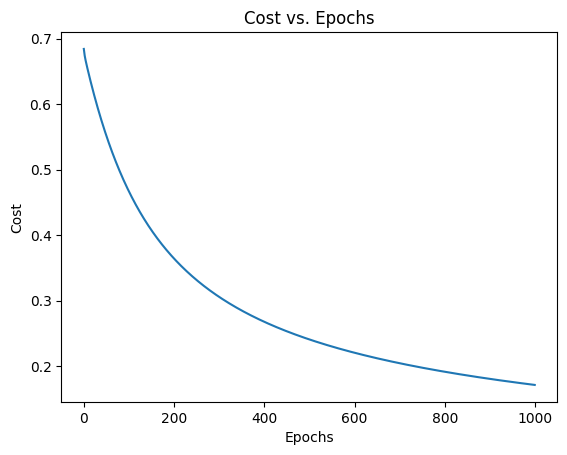

In [1]:
import numpy as np

# Sigmoid Function
def sigmoid(z):
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-z))

# Cost Function (Log-Loss / Cross-Entropy)
def compute_cost(X, y, w, b):
    """
    Computes the cost for logistic regression using log-loss.
    """
    m = len(y)  # Number of training examples
    y_pred = sigmoid(np.dot(X, w) + b)  # Predicted probabilities
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, w, b, alpha, epochs):
    """
    Performs gradient descent to learn w and b.
    """
    m = len(y)  # Number of training examples
    costs = []  # To store the cost at each epoch for plotting

    for epoch in range(epochs):
        # Compute the predicted probabilities
        y_pred = sigmoid(np.dot(X, w) + b)

        # Compute the gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update the parameters
        w -= alpha * dw
        b -= alpha * db

        # Compute the cost after each epoch
        cost = compute_cost(X, y, w, b)
        costs.append(cost)

        # Print the cost for every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return w, b, costs

# Logistic Regression Model
def logistic_regression(X, y, alpha=0.01, epochs=1000):
    """
    Implements logistic regression model from scratch.
    """
    # Initialize weights and bias
    w = np.zeros(X.shape[1])  # weights initialized to zero
    b = 0  # bias initialized to zero

    # Perform gradient descent
    w, b, costs = gradient_descent(X, y, w, b, alpha, epochs)

    return w, b, costs

# Prediction function
def predict(X, w, b):
    """
    Predicts the class labels for input features X.
    """
    y_pred = sigmoid(np.dot(X, w) + b)
    return [1 if i >= 0.5 else 0 for i in y_pred]

# Example Usage
if __name__ == "__main__":
    # Example data: Simple dataset for binary classification
    X = np.array([[1], [2], [3], [4], [5]])  # Feature
    y = np.array([0, 0, 0, 1, 1])  # Target (binary labels)

    # Train the logistic regression model
    w, b, costs = logistic_regression(X, y, alpha=0.1, epochs=1000)

    # Print the final weights and bias
    print(f"Final weights: {w}")
    print(f"Final bias: {b}")

    # Predict on new data
    X_new = np.array([[6], [7]])  # New data points
    predictions = predict(X_new, w, b)

    print(f"Predictions for X_new: {predictions}")

    # Plot the cost curve (optional)
    import matplotlib.pyplot as plt
    plt.plot(costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs. Epochs')
    plt.show()
